<a href="https://colab.research.google.com/github/Yusuf5351/YUSUF-M-MIYAJIWALA/blob/master/machinelearning_projectbyYUSUF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import pyplot
from sklearn.neighbors  import KNeighborsRegressor as knr
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
%matplotlib inline
import seaborn as sns
from random import randrange, uniform

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# for Logistic regression
from sklearn.linear_model import LogisticRegression

# for KNN model
from sklearn.neighbors import KNeighborsClassifier

# for Naive Bayes model
from sklearn.naive_bayes import GaussianNB


In [ ]:
from google.colab import files
uploaded = files.upload()
#UPLOADING THE DATA SET USING UPLOAD FUNCTION


Saving Bank_Personal_Loan_Modelling1.csv to Bank_Personal_Loan_Modelling1.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling1.csv']))

In [ ]:
df2.describe()
#describing the dataset

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df2.head(10)
#displaying first 10 values of dataset

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,34,9,180,1,8.9,3,0,1,0,0,0,0


In [ ]:
df2.columns
#displaying columns of datasets

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [ ]:
df2.shape
#displaying the dimension of dataset

(5000, 12)

In [ ]:
df2.info()
#checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [ ]:
df2.isnull().any()
#checking for null values in each columns(asthere are no null values all are false)

Age                   False
Experience            False
Income                False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [ ]:
df2.isnull().values.any()
#checking for null values in entire data set

False

**STEP2**

**REMOVING UNWANTED DATA**

In [ ]:
df2['Experience'].unique()
#checking any negative values in exp. column

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
df2['Experience'] = df2['Experience'].replace([-3, -2, -1],0)
#as experience can not be in negative,so replacing it with zero

In [ ]:
df2 = df2.drop(['ID','ZIP Code'], axis = 1)
#removing the id and zip code as it is further not needed 

KeyError: ignored

In [ ]:
df2.describe().transpose()
#previewing data after removing negative value in exp and dropping id and zip code column

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.119600,11.440484,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


**STEP 3**

STUDYING THE DISTRIBUTION IN EACH ATTRIBUTE AND FINDING UNIQUE VALUES

In [ ]:
df2.apply(lambda x: len(x.unique()))

Age                    45
Experience             44
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

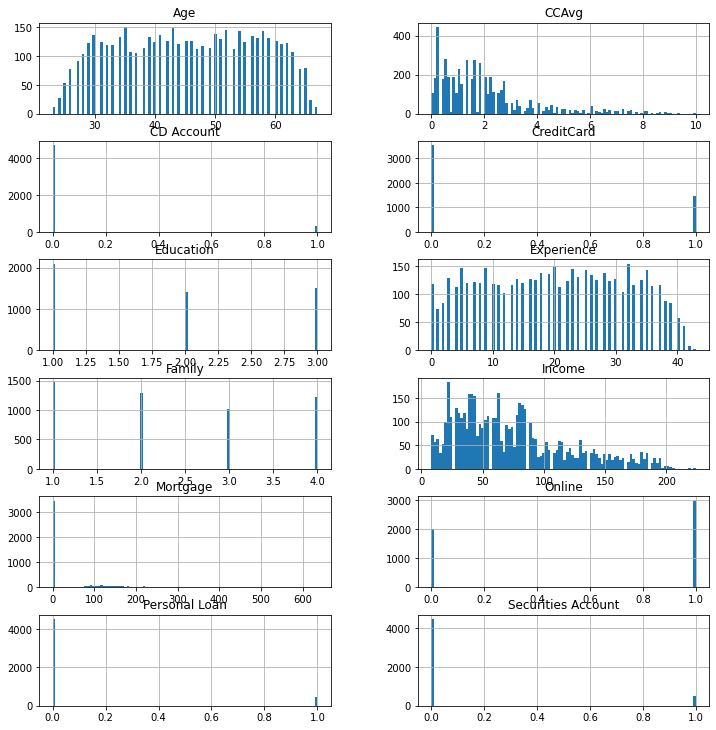

In [ ]:

columns = list(df2) 
df2[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

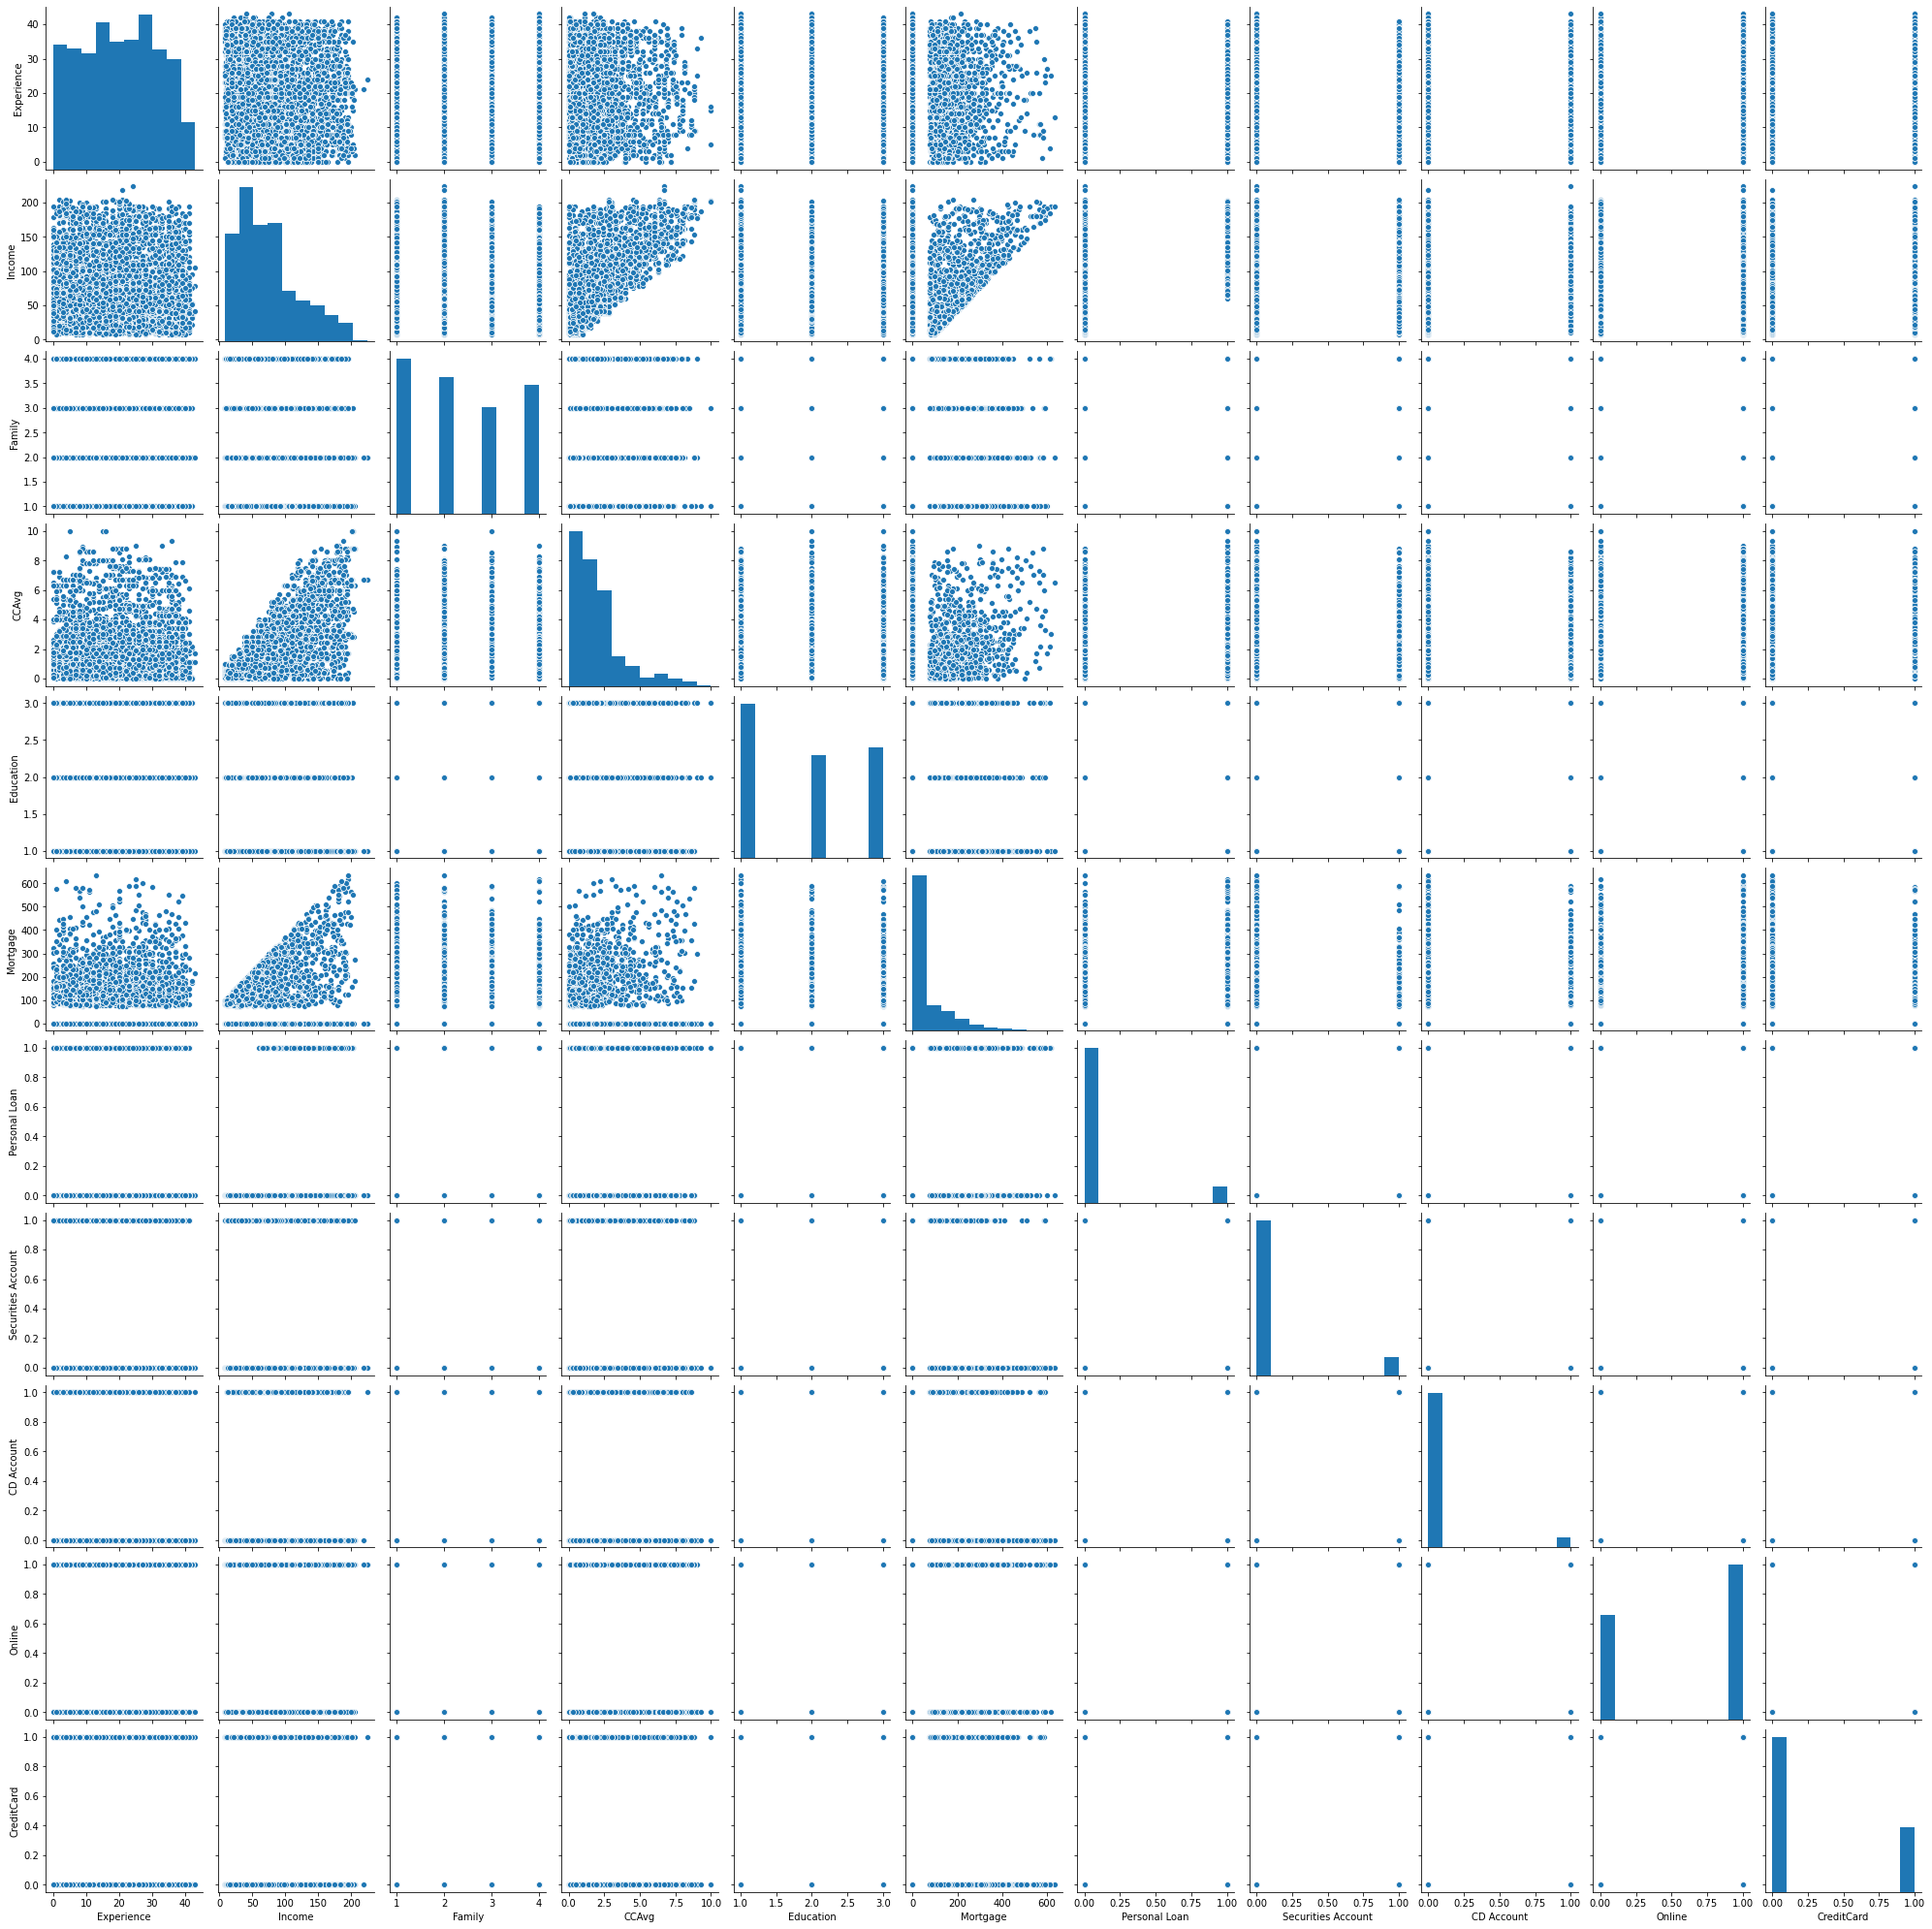

In [ ]:
sns.pairplot(df2.iloc[:,1:])

In [ ]:
df2.corr() 
#checking correlation matrix

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994198,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994198,1.000000,-0.046729,-0.052213,-0.049912,0.013536,-0.010840,-0.007858,-0.001111,0.010046,0.013975,0.008910
Income,-0.055269,-0.046729,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052213,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049912,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013536,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010840,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007858,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001111,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010046,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [ ]:
def plot_corr(df2, size=10):
    corr = df2.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
#for graphical representation of correlation

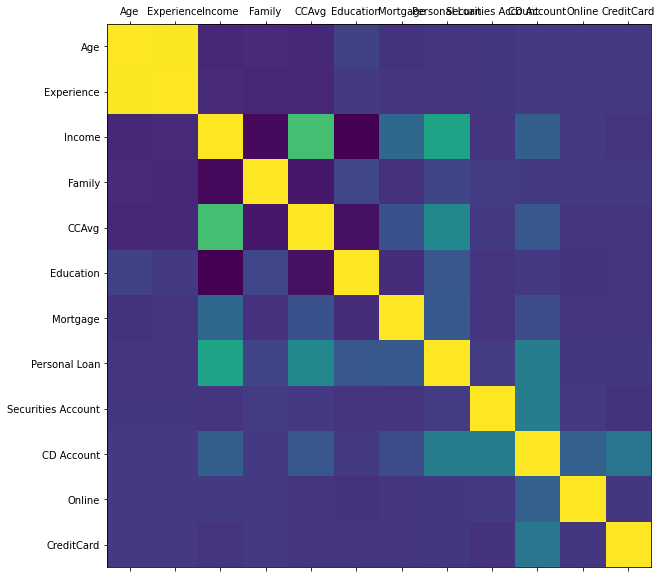

In [ ]:
plot_corr(df2)

==>FROM THE ABOVE PLOT ,BLUE COLOR REPRESENTS MINIMUM CORRELATION AND YELLOW COLOR REPRESENT MAXIMUM CORRELATION

==>ONLY AGE AND EXPERIENCE HAVE CORRELATION WITH EACH OTHER,NO OTHER VARIABLE HAVE IT

==>In **age** feature distribution we can see that maximum customer fall under age group of 30-60,as mean is equal to median


==>**Experience** is normally distributed as more customer has minimum of 8 years of experience,as mean is equal to median,3-4 negative values from experience is removed as it can cause data error


==>**Income** is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

==>**CCAvg** is also a positively skewed variable and **AVERAGE SPENDING OF CUSTOMER IS BETWEEN 0-10K,AND MOSTLY CUSTOMER SPENDS UNDER 2.5K**

==>**Mortgage** - 70% of the individuals have a mortgage of less than 40K. the maximum value of mortgage is 635k

The variables family and education are ordinal variables. The distribution of families is evenly distributes

The following code does the below steps:

For the record with the ID, get the value of Age column For the record with the ID, get the value of Education column Filter the records matching the above criteria from the data frame which has records with positive experience and take the median Apply the median back to the location which had negative experience

UNIVARIATE AND BIVARIATE ANALYSIS

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


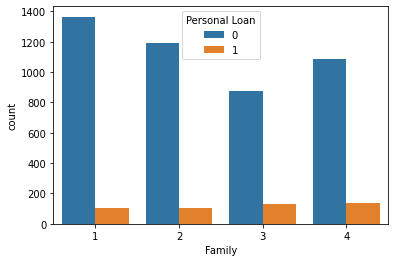

In [ ]:
#for Family
print(pd.pivot_table(data=df2,index='Personal Loan',columns='Family',aggfunc='size'))
sns.countplot(x='Family',data=df2,hue='Personal Loan')

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


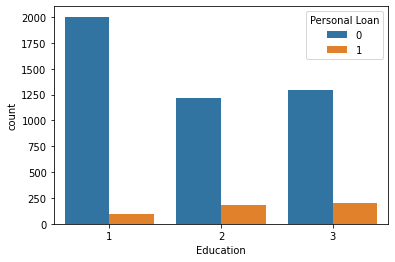

In [ ]:

print(pd.pivot_table(data=df2,index='Personal Loan',columns='Education',aggfunc='size'))
sns.countplot(x='Education',data=df2,hue='Personal Loan')
#education

0    4520
1     480
Name: Personal Loan, dtype: int64


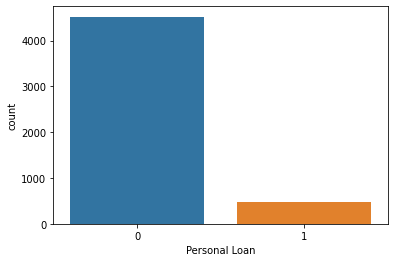

In [ ]:
print(df2['Personal Loan'].value_counts())
sns.countplot(x='Personal Loan',data=df2)
#personallloan

CD Account        0    1
Personal Loan           
0              4358  162
1               340  140


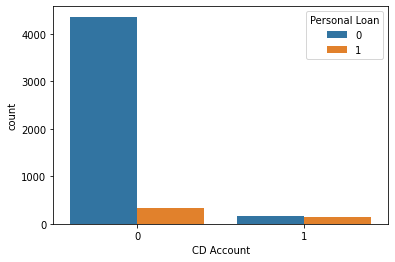

In [ ]:

print(pd.pivot_table(data=df2,index='Personal Loan',columns='CD Account',aggfunc='size'))
sns.countplot(x='CD Account',data=df2,hue='Personal Loan')
#cdaccount

CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143


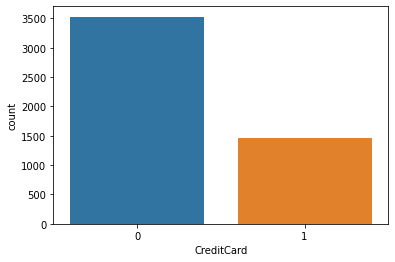

In [ ]:

print(pd.pivot_table(data=df2,index='Personal Loan',columns='CreditCard',aggfunc='size'))
sns.countplot(x='CreditCard',data=df2)
#credcard

Online            0     1
Personal Loan            
0              1827  2693
1               189   291


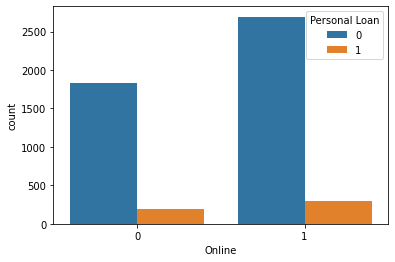

In [ ]:
print(pd.pivot_table(data=df2,index='Personal Loan',columns='Online',aggfunc='size'))
sns.countplot(x='Online',data=df2,hue='Personal Loan')
#onlne

In [ ]:
df2.groupby(["Personal Loan"]).mean()
#checking personal loan column to see how data is distributed among various value

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.148894,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [ ]:
df2['Personal Loan'] =df2['Personal Loan'].astype('category')
df2['Education'] =df2['Education'].astype('category')
df2['Securities Account'] = df2['Securities Account'].astype('category')
df2['CD Account'] = df2['CD Account'].astype('category')
df2['Online'] = df2['Online'].astype('category')
df2['CreditCard'] = df2['CreditCard'].astype('category')
#replacing the x and y variable to categorical value

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal Loan       5000 non-null   category
 8   Securities Account  5000 non-null   category
 9   CD Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 264.4 KB


NORMALIZING DATA AND SPLITTING IT INTO TEAT AND TRAIN SET

In [ ]:

prop_Y = df2['Personal Loan'].value_counts(normalize=True)
print(prop_Y)
#ratio of Yes to No to identify data imbalance

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


In [ ]:

X = df2.drop('Personal Loan', axis=1)
Y = df2['Personal Loan']
# defining x and y,as personal loan is target attribute so it is dropped

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()
#splitting into training and test set in 70:30 ratio,and random state set to 1

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,22,35,2,1.3,1,0,0,0,1,0
4768,38,14,39,1,2.0,2,0,0,0,1,0
65,59,35,131,1,3.8,1,0,0,0,1,1
177,29,3,65,4,1.8,2,244,0,0,0,0
4489,39,13,21,3,0.2,2,0,0,0,1,0


In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df2.index)) * 100))
#previewing the changes


70.00% data is in training set
30.00% data is in test set


comparing personal loan true or false ratio ,original values with training and set values

In [ ]:

print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(df2.loc[df2['Personal Loan'] == 1]), (len(df2.loc[df2['Personal Loan'] == 1])/len(df2.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(df2.loc[df2['Personal Loan'] == 0]), (len(df2.loc[df2['Personal Loan'] == 0])/len(df2.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

#comparing personal loan true or false ratio ,original values with training and set values,and printing it

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



**APPLYING MACHINE LEARNING MODEL**

### 1)DECISION TREE

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

dtree_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dtree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtree_model.score(x_test , y_test)

0.972

In [ ]:
y_predict = dtree_model.predict(x_test)
y_predict[:5]

array([0, 0, 0, 0, 0])

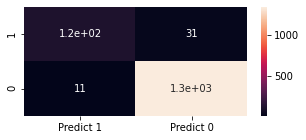

In [ ]:
cmatrix=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cmatrix = pd.DataFrame(cmatrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cmatrix, annot=True)

In [ ]:
cmatrix

array([[ 118,   31],
       [  11, 1340]])

In [ ]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CMATRIX = confusion_matrix(y_test, y_pred)
CMATRIX = pd.crosstab(y_test, y_predict)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CMATRIX.iloc[0,0]
FN = CMATRIX.iloc[1,0]
TP = CMATRIX.iloc[1,1]
FP = CMATRIX.iloc[0,1]



In [ ]:

print(((TP+TN)*100)/(TP+TN+FP+FN))
#TO check accuracy of model
#accuracy_score(y_test, y_pred)*100

 
print((FN*100)/(FN+TP))
#False Negative rate



97.2
20.80536912751678


### 2)LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#BUILDING THE LOGISTIC MODAL


y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
#predict on test

          0         1         2  ...        9       10  intercept
0 -0.398982  0.398405  0.048948  ... -0.57803 -1.01321  -2.511149

[1 rows x 12 columns]


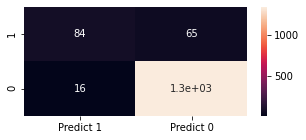

In [ ]:

cmatrix=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cmatrix = pd.DataFrame(cmatrix, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cmatrix, annot=True)

In [ ]:
cmatrix
#preview

array([[  84,   65],
       [  16, 1335]])

In [ ]:
#building the confusion matrix
# from sklearn.metrics import confusion_matrix 
# CMATRIX = confusion_matrix(y_test, y_pred)
CMATRIX = pd.crosstab(y_test, y_predict)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CMATRIX.iloc[0,0]
FN = CMATRIX.iloc[1,0]
TP = CMATRIX.iloc[1,1]
FP = CMATRIX.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

94.6
43.624161073825505


from The confusion matrix we can say that:-

True Positives (TP): we have correctly predicted people **with Personal Loan is 84**

True Negatives (TN): we have correctly predicted people **without** **Personal Loan is 1335**

False Positives (FP): we incorrectly predicted people who have Personal Loan (a "Type I error"): 16 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted people who do not have Personal Loan (a "Type II error"): 65 Falsely predict negative Type II error

**RECIEVER  OPERATING CHARACTERISTIC(ROC CURVE)**

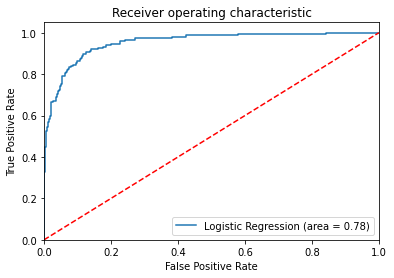

In [ ]:


logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
#AUC ROC curve

by seeing the above curve we can say that,The ROC curve has better True Positive rate than False Positive Rate

In [ ]:

auc_score = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
round( float( auc_score ), 2 )
#calculating score

0.95

### 3)BUILDING KNN MODEL

In [ ]:
NNK = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [ ]:


NNK.fit(x_train, y_train)

# Call Nearest Neighbour algorithm

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [64]:
predicted_labels_KNN = NNK.predict(x_test)

In [68]:
#buildING confusion matrix
# from sklearn.metrics import confusion_matrix 
# CMATRIX = confusion_matrix(y_test, y_pred)
CMATRIX = pd.crosstab(y_test, y_predict)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CMATRIX.iloc[0,0]
FN = CMATRIX.iloc[1,0]
TP = CMATRIX.iloc[1,1]
FP = CMATRIX.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

94.6
43.624161073825505


In [ ]:
# for cross validation
#Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from the above list using the Mis 
#classification error

In [71]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [72]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # predict the response
    y_pred = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


In [73]:

#building confusion matrix
# from sklearn.metrics import confusion_matrix 
# CMATRIX = confusion_matrix(y_test, y_pred)
CMATRIX = pd.crosstab(y_test, y_pred)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CMATRIX.iloc[0,0]
FN = CMATRIX.iloc[1,0]
TP = CMATRIX.iloc[1,1]
FP = CMATRIX.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

90.4
73.15436241610739


In [ ]:
#Plotting misclassification error vs k (with k value on X-axis) using matplotlib.

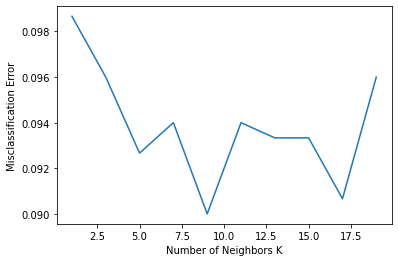

In [74]:
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [75]:
#Using k=9 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))


0.91


In [76]:
#building confusion matrix
# from sklearn.metrics import confusion_matrix 
# CMATRIX = confusion_matrix(y_test, y_pred)
CMATRIX = pd.crosstab(y_test, y_predict)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CMATRIX.iloc[0,0]
FN = CMATRIX.iloc[1,0]
TP = CMATRIX.iloc[1,1]
FP = CMATRIX.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

94.6
43.624161073825505


BY APPLYING KNN MODEL WE CAN SEE THAT IT HAS GOOD ACCURACY AND RECALL SCORE

### 4)TRAIN NAIVE BAYES MODEL

In [77]:
# creating the model
NBmodel = GaussianNB()

NBmodel.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)


Now Gaussian NB classifier is built. The classifier is trained using training data. We can use fit() method for training it. After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameter.

In [78]:
y_pred = NBmodel.predict(x_test)

Confusion Matrix


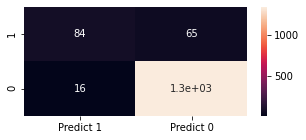

In [79]:

from sklearn import metrics

print("Confusion Matrix")
cmatrix=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cmatrix, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (5,2))
sns.heatmap(df_cmatrix, annot=True)
# calculating accuracy measures and confusion matrix

In [80]:
cmatrix

array([[  84,   65],
       [ 123, 1228]])

In [81]:
#building confusion matrix
# from sklearn.metrics import confusion_matrix 
# CMATRIX = confusion_matrix(y_test, y_pred)
CMATRIX = pd.crosstab(y_test, y_pred)
# empty list that will hold accuracy scores
ac_scores = []
#let us save TP, TN, FP, FN
TN = CMATRIX.iloc[0,0]
FN = CMATRIX.iloc[1,0]
TP = CMATRIX.iloc[1,1]
FP = CMATRIX.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

87.46666666666667
43.624161073825505


### **CONCLUSIONS**

AFTER COMPARING ALL 4 MODELS WE HAVE CONCLUDED THAT--

the best model is decesion tree,followed by logistic regression followed by KNN and naive bayes with accuracy score as follows

1)decesion tree:-97.2%
2)logistic regression:-94.6%
3)KNN :-91%
4)NB:-87.46%

Hence DECESION TREE is the best model for this case & it performs better than others as above accuracy & respective findings from Confusion Matrix.